<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Task 1: Data Cleaning & Preprocessing
# Dataset: Titanic (https://www.kaggle.com/datasets/yasserh/titanic-dataset)


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2. Load Dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")   # make sure titanic.csv is in your working directory
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

In [5]:
# 3. Handle Missing Values
# strategy:
# Age -> fill with median
# Embarked -> fill with mode
# Cabin -> drop (too many missing)

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin"], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-656478400.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-656478400.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [6]:
# 4. Encode Categorical Variables
# Sex and Embarked are categorical
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

print("\nColumns after encoding:\n", df.columns)


Columns after encoding:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [7]:
# 5. Feature Scaling (Normalization & Standardization)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Apply scaling to numerical columns (example: Age, Fare)
df["Age_norm"] = scaler_minmax.fit_transform(df[["Age"]])
df["Fare_norm"] = scaler_minmax.fit_transform(df[["Fare"]])

df["Age_std"] = scaler_standard.fit_transform(df[["Age"]])
df["Fare_std"] = scaler_standard.fit_transform(df[["Fare"]])

print("\nScaled features added.")


Scaled features added.


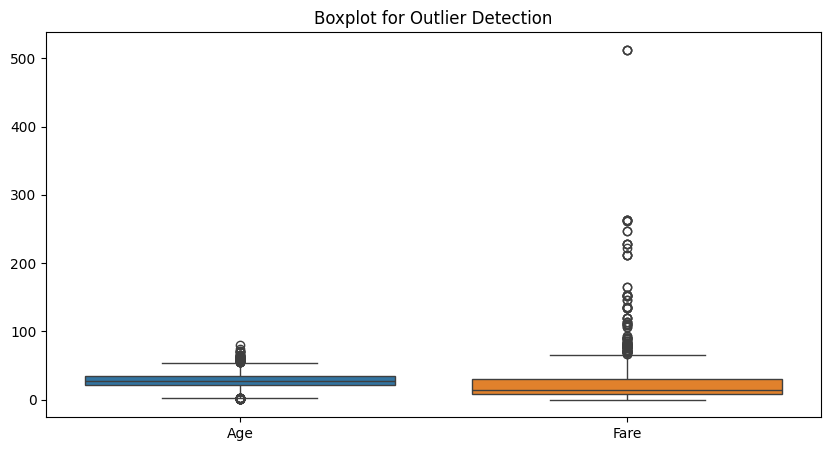


Shape after outlier removal: (775, 16)


In [8]:
# 6. Outlier Detection & Removal
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Age", "Fare"]])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Removing outliers using IQR for Fare
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["Fare"] >= lower) & (df["Fare"] <= upper)]

print("\nShape after outlier removal:", df.shape)

In [9]:
# 7. Final Dataset
print("\nCleaned dataset ready for ML!")
print(df.head())

# Save processed data
df.to_csv("titanic_cleaned.csv", index=False)
print("\nCleaned dataset saved as titanic_cleaned.csv")


Cleaned dataset ready for ML!
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris  22.0      1      0   
2                        Heikkinen, Miss. Laina  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                      Allen, Mr. William Henry  35.0      0      0   
5                              Moran, Mr. James  28.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  Age_norm  \
0         A/5 21171   7.2500      True       False        True  0.271174   
2  STON/O2. 3101282   7.9250     False       False        True  0.321438   
3            113803  53.1000     False       False        True  0.434531   
4            373450  